In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
data1, c1  = df.Data_gussian_cluster()
data2, c2 = df.Data_circ_cluster()
data3, c3 = df.Data_separated_clusters()

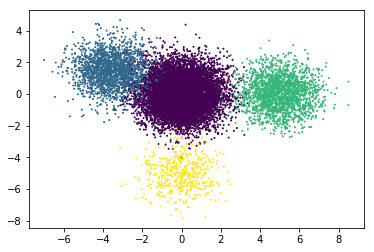

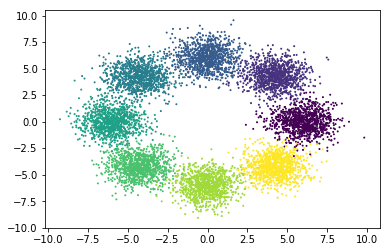

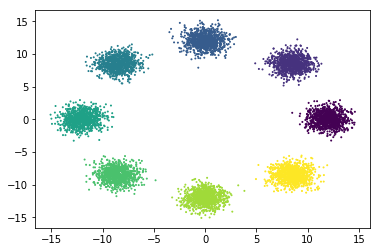

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.show()

In [3]:
def ComputeBIC_kmeans(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    
    #BIC = [cl_var + i*d*np.log(n) for i in range(m)]
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)
    
    


In [4]:
def ComputeBIC_spec_clus(SpectralClustering, data):
    centers = [SpectralClustering.cluster_centers_]
    labels  = SpectralClustering.labels_
    m = SpectralClustering.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    
    #BIC = [cl_var + i*d*np.log(n) for i in range(m)]
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)

In [20]:
ks = range(1,3)
KMeans1 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
KMeans2 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks]
KMeans3 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks]
BIC_kmeans1 = [ComputeBIC_kmeans(kmeansi,data1) for kmeansi in KMeans1]
BIC_kmeans2 = [ComputeBIC_kmeans(kmeansi,data2) for kmeansi in KMeans2]
BIC_kmeans3 = [ComputeBIC_kmeans(kmeansi,data3) for kmeansi in KMeans3]




In [22]:
SpecClus1 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data1) for k in ks]
BIC_SpecClus1 = [ComputeBIC_kmeans(kmeansi,data1) for kmeansi in SpecClus1]

AttributeError: 'SpectralClustering' object has no attribute 'cluster_centers_'

[61594.70318258695, 59195.34472191999]
[46277.99161820521, 47660.92990655681]
[57059.57692606155, 58235.0279469482]


Text(0, 0.5, 'value for BIC')

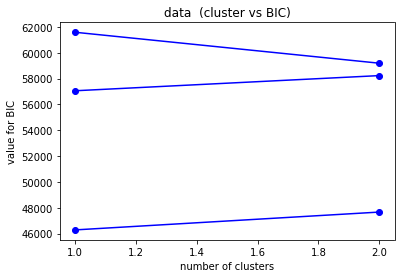

In [21]:
print(BIC_kmeans1)
plt.plot(ks,BIC_kmeans1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
print(BIC_kmeans2)
plt.plot(ks,BIC_kmeans2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
print(BIC_kmeans3)
plt.plot(ks,BIC_kmeans3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")



